# Small Image Classification Using Convolutional Neural Network (CNN)

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification. We will also compare the erformance of ANN and CNN.

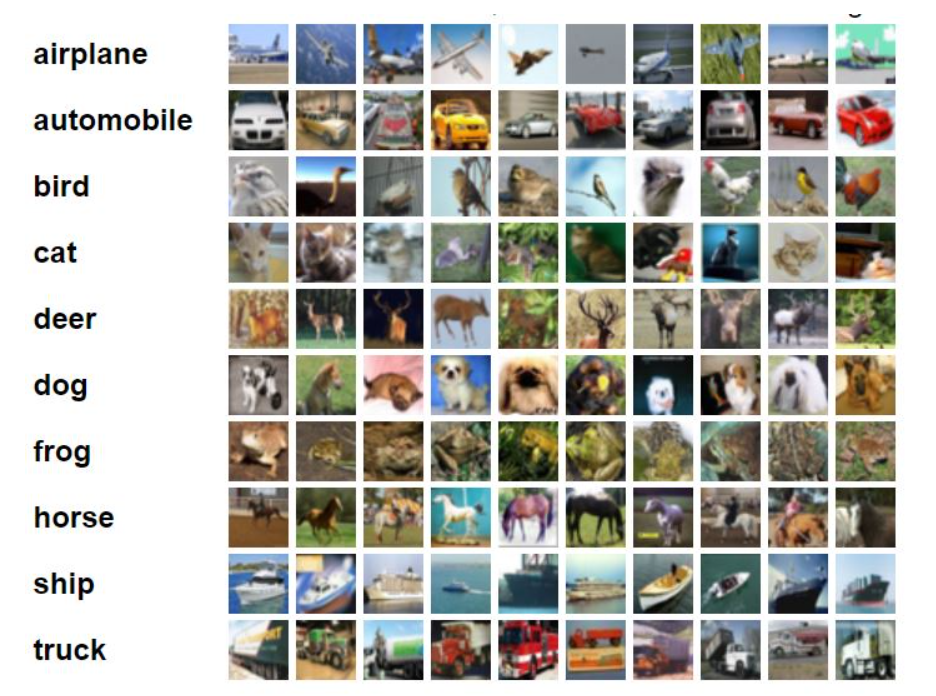

**HERE WE IMPORT ALL THE LIBRARIES AND DATASETS** 

In [91]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

from keras.callbacks import Callback
from keras import backend as k

from tensorflow.keras import datasets, layers, models
(train_img, train_lab), (test_img, test_lab) = datasets.cifar10.load_data()

from keras.utils import np_utils
from keras.datasets import cifar10

import numpy as np
import matplotlib.pyplot as plt

from google.colab import files


**HERE WE LOAD THE DATASETS**

We can see below there are 50000 training images and 10000 test images

In [2]:

(X_train, y_train),(X_test,y_test)= cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

We try to plot some training images

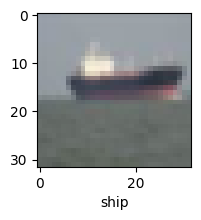

In [10]:
plot_sample(X_train, y_train, 69)

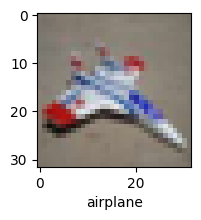

In [11]:
plot_sample(X_train, y_train, 30)

# Normalizing the training data
We need to Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Builing an Artificial Neural Network
We now build simple artificial neural network for image classification

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 144s 91ms/step - loss: 1.8102 - accuracy: 0.3552
Epoch 2/10
1563/1563 [==============================] - 143s 92ms/step - loss: 1.6219 - accuracy: 0.4291
Epoch 3/10
1563/1563 [==============================] - 143s 92ms/step - loss: 1.5411 - accuracy: 0.4570
Epoch 4/10
1563/1563 [==============================] - 149s 96ms/step - loss: 1.4789 - accuracy: 0.4798
Epoch 5/10
1563/1563 [==============================] - 143s 92ms/step - loss: 1.4307 - accuracy: 0.4972
Epoch 6/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.3875 - accuracy: 0.5101
Epoch 7/10
1563/1563 [==============================] - 143s 92ms/step - loss: 1.3507 - accuracy: 0.5266
Epoch 8/10
1563/1563 [==============================] - 153s 98ms/step - loss: 1.3155 - accuracy: 0.5393
Epoch 9/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.2813 - accuracy: 0.5510
Epoch 10/10
1563/1563 [==============================] 

# We can see that at the end of 5 epochs, accuracy is at around 49%

# Now let us build a convolutional neural network to train our images

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 78s 49ms/step - loss: 1.5332 - accuracy: 0.4477
Epoch 2/10
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1541 - accuracy: 0.5937
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.0124 - accuracy: 0.6473
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9235 - accuracy: 0.6789
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8661 - accuracy: 0.6996
Epoch 6/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8144 - accuracy: 0.7181
Epoch 7/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7732 - accuracy: 0.7327
Epoch 8/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7325 - accuracy: 0.7441
Epoch 9/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7026 - accuracy: 0.7560
Epoch 10/10
1563/1563 [==============================] - 76s 49m

**With CNN, at the end 5 epochs, accuracy was at around 71.5% which is a significant improvement over ANN's 49%. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [17]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 13ms/step - loss: 0.8858 - accuracy: 0.7007


[0.8857836127281189, 0.7006999850273132]

In [18]:
y_pred = cnn.predict(X_test)   
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[9.99051626e-05, 5.12578445e-05, 1.29301741e-03, 7.36931384e-01,
        1.24161219e-04, 2.57641226e-01, 8.03245290e-04, 1.79507770e-05,
        2.65153893e-03, 3.86246655e-04],
       [1.71918931e-04, 1.56956196e-01, 5.84757072e-06, 4.10182466e-08,
        2.00910009e-08, 3.79911258e-09, 1.04156808e-08, 2.74828889e-08,
        8.42539072e-01, 3.26800335e-04],
       [1.66159317e-01, 9.00365561e-02, 3.82986455e-03, 2.86951126e-03,
        6.90206769e-04, 1.72411802e-03, 7.15931237e-05, 2.25957925e-03,
        6.21187925e-01, 1.11171342e-01],
       [9.53771532e-01, 5.30184899e-03, 1.57464184e-02, 5.71409357e-04,
        2.75553204e-03, 4.90086095e-05, 2.70896817e-05, 6.40378275e-05,
        2.11926773e-02, 5.20481146e-04],
       [4.48120181e-06, 1.38941032e-04, 1.42530371e-02, 1.15790321e-02,
        6.69107497e-01, 2.20432226e-03, 3.02642584e-01, 1.24882445e-05,
        4.75006054e-05, 1.00421021e-05]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

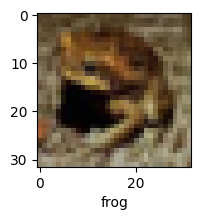

In [21]:
plot_sample(X_test, y_test,300)

In [22]:
classes[y_classes[300]]

'frog'

In [23]:
classes[y_classes[300]]

'frog'

# ***Freezeing indivial layers of the CNN and extracting their output to feed into XGboost***

In [29]:
import tensorflow as tf
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential                                             

In [30]:
keras.backend.clear_session()
model1 = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
#Add another convolution
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2, 2),


#Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version
tf.keras.layers.Flatten(),
#The same 128 dense layers, and 10 output layers as in the pre-convolution example:
tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

In [31]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [38]:
# compiling
from keras.utils import to_categorical

model1.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model1.fit(train_img, to_categorical(train_lab), epochs = 2, verbose = 1, validation_data = (test_img, to_categorical(test_lab)))

Epoch 1/2
1563/1563 [==============================] - 92s 58ms/step - loss: 1.7470 - accuracy: 0.4135 - val_loss: 1.3528 - val_accuracy: 0.5143
Epoch 2/2
1563/1563 [==============================] - 94s 60ms/step - loss: 1.2811 - accuracy: 0.5479 - val_loss: 1.3557 - val_accuracy: 0.5454


In [33]:
import numpy as np

# ***Intermediate Layer, before the data is fed into XGBoost***

In [34]:
flatten_model = tf.keras.Model(inputs = model1.inputs, outputs = model1.layers[6].output)

In [35]:
flatten_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856 

# **Values obtained from the flatten layer wil be used as a Dataset for other models )**

In [39]:
features_train = flatten_model.predict(train_img)

1563/1563 [==============================] - 24s 16ms/step


In [40]:
features_train[0]

array([0.        , 0.        , 0.        , 1.9807718 , 0.        ,
       0.        , 0.        , 0.        , 0.5929286 , 1.3805543 ,
       0.        , 2.6075811 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.5736823 , 0.        ,
       0.        , 0.        , 0.        , 1.903314  , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       4.7192726 , 0.        , 0.        , 4.9949284 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 4.0449576 ,
       1.1141826 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 3.1978264 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.3382029 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.4928874 ,
       2.2458756 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.30947

In [41]:
features_test = flatten_model.predict(test_img)

313/313 [==============================] - 5s 15ms/step


In [42]:
features_train.shape

(50000, 512)

In [43]:
features_test.shape

(10000, 512)

In [44]:
type(features_train)

numpy.ndarray

In [45]:
import pandas as pd

In [46]:
dataset = pd.DataFrame(features_train)

In [47]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.00000,0.0,0.0,1.980772,0.000000,0.0,0.0,0.0,0.592929,1.380554,...,0.0,0.0,0.000000,1.051854,0.0,2.108582,0.000000,2.085277,0.000000,0.0
1,0.00000,0.0,0.0,2.288735,3.189920,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.361037,0.000000,0.000000,0.0
2,0.00000,0.0,0.0,0.000000,2.288477,0.0,0.0,0.0,2.708440,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.023445,0.000000,0.000000,2.371060,0.0
3,0.80385,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.554067,3.961632,...,0.0,0.0,0.567027,0.209669,0.0,3.257664,0.000000,1.210160,0.000000,0.0
4,0.00000,0.0,0.0,1.916099,5.042227,0.0,0.0,0.0,0.306696,2.959148,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.752807,0.392084,5.504596,0.0


In [48]:
dataset['train_label'] = train_lab 

In [49]:
lab_train = dataset['train_label']

In [50]:
train_lab

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [51]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,train_label
0,0.00000,0.0,0.0,1.980772,0.000000,0.0,0.0,0.0,0.592929,1.380554,...,0.0,0.000000,1.051854,0.0,2.108582,0.000000,2.085277,0.000000,0.0,6
1,0.00000,0.0,0.0,2.288735,3.189920,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,2.361037,0.000000,0.000000,0.0,9
2,0.00000,0.0,0.0,0.000000,2.288477,0.0,0.0,0.0,2.708440,0.000000,...,0.0,0.000000,0.000000,0.0,0.023445,0.000000,0.000000,2.371060,0.0,9
3,0.80385,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.554067,3.961632,...,0.0,0.567027,0.209669,0.0,3.257664,0.000000,1.210160,0.000000,0.0,4
4,0.00000,0.0,0.0,1.916099,5.042227,0.0,0.0,0.0,0.306696,2.959148,...,0.0,0.000000,0.000000,0.0,0.000000,0.752807,0.392084,5.504596,0.0,1


In [52]:
dataset.shape

(50000, 513)

Below - 'f' stands for feature

In [53]:
train_f_labels = dataset['train_label']

In [54]:
train_f_labels = train_f_labels.values

In [ ]:
#Train dataset which will get fed into models

In [55]:
train_f = dataset.drop(labels = ['train_label'], axis = 1)

In [56]:
train_f = train_f.values

In [57]:
train_f

array([[0.       , 0.       , 0.       , ..., 2.0852773, 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 2.3710601,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.1094351,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 1.1619129,
        0.       ]], dtype=float32)

In [58]:
import xgboost as xgb

In [59]:
xg = xgb.XGBClassifier(objective = 'multi:softmax', num_class=10, n_estimators = 100, max_depth = 4, learning_rate = 0.1)

# Now, Train features and labels : train_f, train_f_labels
##    Test features and labels : test_f, test_f_labels

In [69]:
xg.fit(train_f, train_f_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=10,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [70]:
train_f_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

Test Dataset

In [71]:
test_f = pd.DataFrame(features_test)

In [72]:
test_f.head(10)

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.000000,2.544328,0.0,0.000000,0.000000,0.0,0.0,0.0,8.681212,3.269476,...,0.0,0.0,0.0,4.205946,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.0,1.129410,10.239846,0.0,0.0,0.0,1.790095,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.095720,0.000000,7.463221,0.0
2,0.000000,0.000000,0.0,0.000000,8.037294,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.539044,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.669558,0.0,0.754155,0.000000,0.0,0.0,0.0,5.251298,3.135877,...,0.0,0.0,0.0,0.000000,0.0,0.000000,8.393066,0.000000,8.490580,0.0
4,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,3.048030,9.547543,...,0.0,0.0,0.0,0.483067,0.0,0.887562,0.804650,2.917513,0.255882,0.0
5,2.167618,0.000000,0.0,2.558584,0.000000,0.0,0.0,0.0,0.892294,1.053887,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.277862,0.000000,0.0
6,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.525575,0.0,6.277459,0.000000,10.502134,0.000000,0.0
7,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,4.252357,6.167631,...,0.0,0.0,0.0,2.579478,0.0,0.000000,0.000000,2.396574,1.967641,0.0
8,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.237492,0.000000,...,0.0,0.0,0.0,1.285362,0.0,1.873197,0.000000,1.140650,0.563643,0.0
9,0.000000,0.000000,0.0,0.000000,3.261831,0.0,0.0,0.0,4.369120,0.000000,...,0.0,0.0,0.0,2.043531,0.0,0.000000,0.000000,0.000000,5.849251,0.0


In [73]:
test_f_labels = test_lab

In [74]:
xg_predictions = xg.predict(test_f)

In [75]:
xg_predictions.shape

(10000,)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy = accuracy_score(test_f_labels, xg_predictions)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.60


In [78]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
import lightgbm as lgb

In [80]:
lgb_clf = lgb.LGBMClassifier()

In [81]:
lgb_clf.fit(train_f, train_f_labels)

LGBMClassifier()

In [82]:
lgb_pred = lgb_clf.predict(test_f)

In [83]:
accuracy_lgb = accuracy_score(test_f_labels, lgb_pred)
print('Accuracy: {:.2f}'.format(accuracy_lgb))

Accuracy: 0.63


# ***Now using CATBOOST***

In [84]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.7 MB/s eta 0:00:00


In [85]:
import catboost as cb

In [86]:
cb_clf = cb.CatBoostClassifier()

In [87]:
cb_clf.fit(train_f, train_f_labels)

Learning rate set to 0.096599
0:	learn: 2.1942147	total: 5.98s	remaining: 1h 39m 36s
1:	learn: 2.1073790	total: 10.6s	remaining: 1h 28m 30s
2:	learn: 2.0398951	total: 15.7s	remaining: 1h 26m 47s
3:	learn: 1.9820375	total: 21.7s	remaining: 1h 29m 55s
4:	learn: 1.9274477	total: 26.1s	remaining: 1h 26m 43s
5:	learn: 1.8786387	total: 32.5s	remaining: 1h 29m 50s
6:	learn: 1.8361574	total: 37.6s	remaining: 1h 28m 55s
7:	learn: 1.7968573	total: 43.2s	remaining: 1h 29m 12s
8:	learn: 1.7651223	total: 46.3s	remaining: 1h 25m
9:	learn: 1.7333198	total: 48.8s	remaining: 1h 20m 35s
10:	learn: 1.7074259	total: 51.4s	remaining: 1h 16m 58s
11:	learn: 1.6789749	total: 53.9s	remaining: 1h 13m 55s
12:	learn: 1.6550405	total: 57.8s	remaining: 1h 13m 10s
13:	learn: 1.6314684	total: 1m	remaining: 1h 10m 46s
14:	learn: 1.6105378	total: 1m 2s	remaining: 1h 8m 44s
15:	learn: 1.5924995	total: 1m 5s	remaining: 1h 6m 56s
16:	learn: 1.5723417	total: 1m 7s	remaining: 1h 5m 27s
17:	learn: 1.5549759	total: 1m 11s	rem

In [88]:
clf_pred = cb_clf.predict(test_f)

In [89]:
accuracy_clf = accuracy_score(test_f_labels, clf_pred)
print('Accuracy: {:.2f}'.format(accuracy_clf))

Accuracy: 0.63


In [92]:
pip install surprise


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195808 sha256=72cad7b7158f21434e1e10e2d62a06c6a0838af2c99d76bffe2542622a010ae0
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise
